# MNIST - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import matplotlib.pyplot as plt

In [9]:
import keras

from keras.datasets import mnist
from keras.utils import to_categorical

In [11]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
keras.__version__ , tf.__version__

('2.4.3', '2.4.1')

## 1. MNIST Dataset Load

In [6]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## 2. Data Preprocessing

### 1) Reshape & Normalization
- reshape

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

- Normalization

In [8]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### 2) One Hot Encoding

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3. MNIST Keras Modeling

### 1) Model Define
- Feature Extraction Layer

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


- Classification Layer

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### 2) Model Compile
- 모델 학습방법 설정

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

### 3) Model Fit

In [17]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 33s 6ms/step - loss: 0.5824 - accuracy: 0.8181 - val_loss: 0.0737 - val_accuracy: 0.9772
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9770 - val_loss: 0.0748 - val_accuracy: 0.9780
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0472 - val_accuracy: 0.9859
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0568 - val_accuracy: 0.9844
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0576 - val_accuracy: 0.9838
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0430 - val_accuracy: 0.989

### 4) 학습결과 시각화
- Loss Visualization

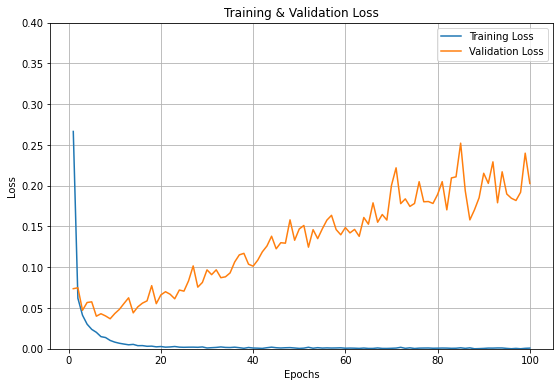

In [20]:
epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
plt.show()

### 5) Model Evaluate
- Loss & Accuracy

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1315 - accuracy: 0.9935
Loss: 0.13146
Accuracy: 0.99350
